In [1]:
import os
work_dir = os.getcwd() 


In [2]:
#python -u preprocess_and_train_device_models.py --density fatty --detector SIM --size 5.0 --lesiondensity 1.06 --dose 2.22e10

LESIONDENSITY = "1.06"
DENSITY = "fatty"
SIZE = "5.0"
DETECTOR = "SIM"
DOSE = "2.22e10"


filedir = work_dir + "/" "data" "/" + "device_data_VICTREPhantoms_spic_" + LESIONDENSITY + "/" + DOSE.replace("+", "") + "/" + DENSITY + "/2/" + SIZE + "/" + DETECTOR + "/" + "P2_5.0_fatty.8336130.1/1"
filename = "DICOM_dm/000.dcm"
filepath = filedir + "/" + filename

### 1. Load DICOM

In [3]:
#Updated opencv 4.6 -> 4.11
#Updated matplotlib 3.10.0
import numpy as np
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ds = dicom.dcmread(filepath)
arr = ds.pixel_array
print(arr.shape)

(1500, 3000)


In [5]:
np.max(arr)

np.uint16(65535)

In [6]:
bounds_fatty_path = './data/metadata/bounds/bounds_fatty.npy'
bounds_saved = np.load('./data/metadata/bounds/bounds_fatty.npy',allow_pickle=True)
for i, x in enumerate(bounds_saved[0]):
    if i != x[0]:
        print("not equal")
        

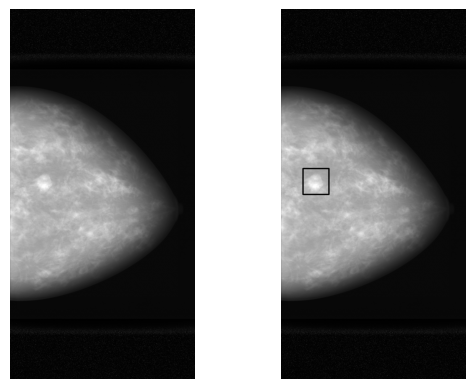

In [7]:
tmp = np.array(arr)
bounds_saved = np.load('./data/metadata/bounds/bounds_fatty.npy',allow_pickle=True)
tmp = tmp#[bounds_saved[0], bounds_saved[1]]

X = np.std(tmp) * 2
TH = np.mean(tmp)
tmp[tmp < TH - X] = 0
tmp[tmp > TH + X] = X+TH


fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(np.rot90(tmp, k=-1, axes=(1, 0)), cmap="gray")
ax1.axis("off")

locFile = filedir + "/projection_DM1.loc" # file that stores coordinates of lesion
file = open(locFile, "r")
lines = file.readlines()
file.close()

coords = [int(v) for v in lines[0].strip().split(" ")[0:2]]


l_mask = np.ones((arr.shape[0], arr.shape[1])) *255.
box_side = 100 ##100 size 5, 125 size 7,  150 size 9
l_mask[
    coords[0] - box_side : coords[0] + box_side,
    coords[1] - box_side : coords[1] + box_side,
] = 50

SL = 10
l_mask[
    coords[0] - box_side + SL : coords[0] + box_side - SL,
    coords[1] - box_side + SL : coords[1] + box_side - SL,
] = 255

x1 = coords[1] - box_side
y1 = coords[0] - box_side
x2 = coords[1] + box_side + SL
y2 = coords[0] + box_side + SL

ax2.imshow(tmp)
tmp1 = np.array(tmp)
cv2.rectangle(tmp1, (x1,y1), (x2,y2), color=(0, 0, 0), thickness=10)

ax2.axis("off")
plt.imshow(np.rot90(tmp1), cmap='gray')


In [8]:
X + TH

np.float64(1325.052937356717)

(np.float64(-0.5), np.float64(1198.5), np.float64(1573.5), np.float64(-0.5))

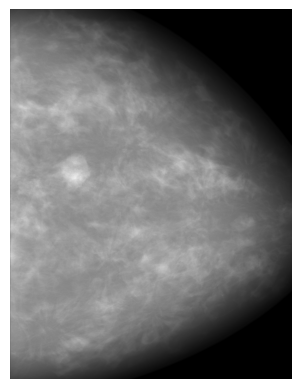

In [9]:
tmp = ds.pixel_array
tmp = tmp[bounds_saved[0], bounds_saved[1]]

plt.imshow(np.rot90(tmp/255.), cmap='gray')
plt.axis("off")


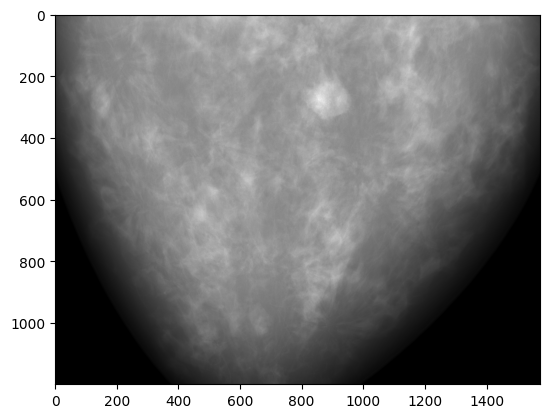

In [22]:
tmp = np.array(arr)/255
tmp = tmp[bounds_saved[0], bounds_saved[1]]
plt.imshow(tmp, cmap = "gray")

In [28]:
coords

[278, 1596]

In [72]:
bounds_saved[0]

array([10])